### Prpeocessing 

In [23]:
#import Library of python
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')
sys.path.insert(0,'../scr/')
from file_handler import FileHandler
from clean_data import data_preProcessing_script
from visualize_data import visualize
File_handler=FileHandler()

In [24]:
# The load the raw sales data
data_path = 'data/train.csv'
version = 'v3'
repo = '../'

train_df = File_handler.dvc_get_data(data_path, version, repo)

# Finally load the test data
data_path2 = 'data/test.csv'
version = 'v5'
test_df = File_handler.dvc_get_data(data_path2, version, repo)

# Finally load the test data
data_path3 = 'data/store.csv'
version = 'vs'
store_df = File_handler.dvc_get_data(data_path3, version, repo)

2022-09-08 13:37:20,511 — FileHandler — INFO — DVC: CSV file read with path: data/train.csv | version: v3 | from: ../
2022-09-08 13:37:20,979 — FileHandler — INFO — DVC: CSV file read with path: data/test.csv | version: v5 | from: ../
2022-09-08 13:37:21,008 — FileHandler — INFO — DVC: CSV file read with path: data/store.csv | version: vs | from: ../


Visualize the Dataset

In [44]:
#train data
train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [45]:
#test data
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [46]:
#store data
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [28]:

preprocess_store = data_preProcessing_script(store_df)
preprocess_store.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Missing value handle

In [47]:
preprocess_store.colums_WithMissingValue()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [48]:
preprocess_store.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


In [52]:
train_df.Date = pd.to_datetime(train_df["Date"])
test_df.Date = pd.to_datetime(test_df["Date"])

In [ ]:
train_data_cleaner = DataCleaner(train_data)
test_data_cleaner = DataCleaner(test_data)
store_data_cleaner = DataCleaner(store_data)

In [ ]:
train_data_cleaner.separate_date_column(date_column='Date')
test_data_cleaner.separate_date_column(date_column='Date')

Outliers

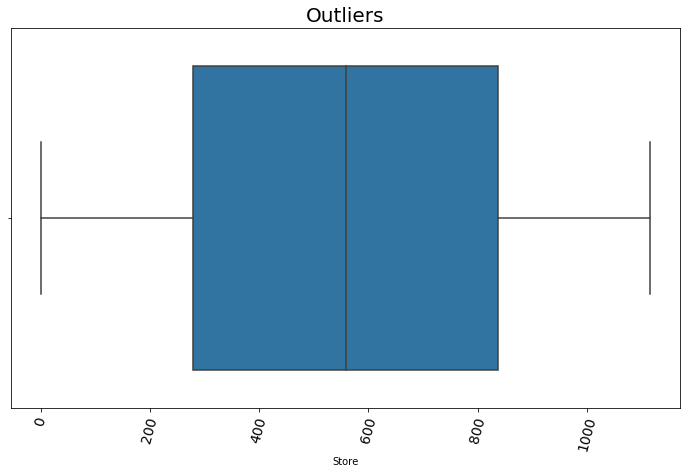

In [36]:
visualize.plot_box(store_df, 'Store', 'Outliers')

In [ ]:
exploration.plot_box(test_data, 'DayOfWeek', 'Outliers')

In [ ]:
exploration.plot_box(store_data, 'CompetitionDistance', 'Outliers')

In [ ]:
exploration.plot_box(store_data, 'Promo2', 'Outliers')

In [ ]:
exploration.plot_box(store_data, 'CompetitionOpenSinceMonth', 'Outliers')

Fixing Outliers

In [ ]:
train_data_cleaner.replace_outlier_with_median(train_data, 'Sales')

In [ ]:
train_data_cleaner.replace_outlier_with_median(store_data, 'CompetitionDistance')
train_data_cleaner.replace_outlier_with_median(store_data, 'CompetitionOpenSinceMonth')

In [ ]:
# Merging the training dataset with the store dataset 
train_store_data=pd.merge(train_data, store_data, on='Store', how='inner')

In [ ]:
# Merging the test dataset with the store dataset
test_store_data=pd.merge(test_data, store_data, on='Store', how='inner')

In [ ]:
train_store_data.to_csv('../data/train_store.csv', index=False)
test_store_data.to_csv('../data/test_store.csv', index=False)